### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [90]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# ackley - функция (одномерный массив?), args - доп. параметры, необходимые для полного обозначения функции (зачастую в виде кортежей)
# bounds - границы переменной Х
# seed - если нет этого обозначения, используется случайное состояние одиночки???

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

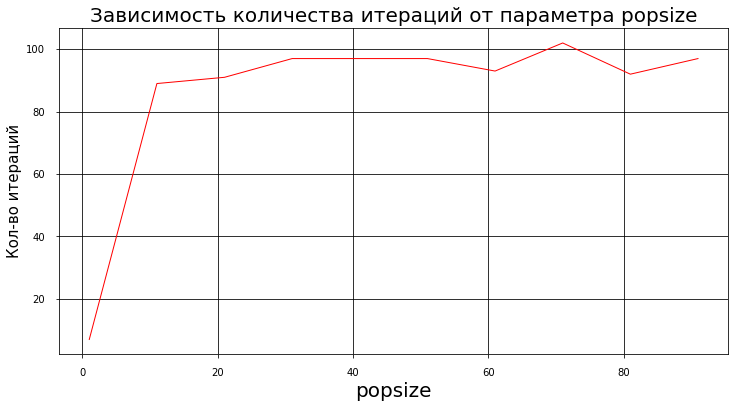

In [79]:
# popsize - множитель для установки окончательного размера популяции

i  =  1 
res  =  [] 
param  =  [] 
while  i  <=  100:     
   res.append(differential_evolution(ackley,  bounds,  popsize=i,  seed=42 )['nit']) 
   param.append(i) 
   i += 10 

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major',
        color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title("Зависимость количества итераций от параметра popsize", size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('popsize', size = 20) 
plt.show()

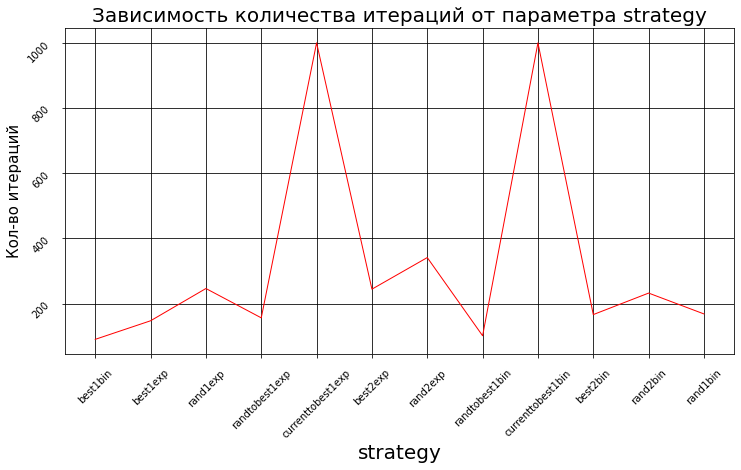

In [77]:
# strategy - стратегия для использования, по умолчанию используется best2bin

i  =  1 
res  =  [] 
param  =  []

for i in ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp','rand2exp','randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']:
    res.append(differential_evolution(ackley,  bounds,  strategy=i,  seed=42 )['nit']) 
    param.append(i)
    

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major',
        color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title("Зависимость количества итераций от параметра strategy", size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('strategy', size = 20) 
plt.show()

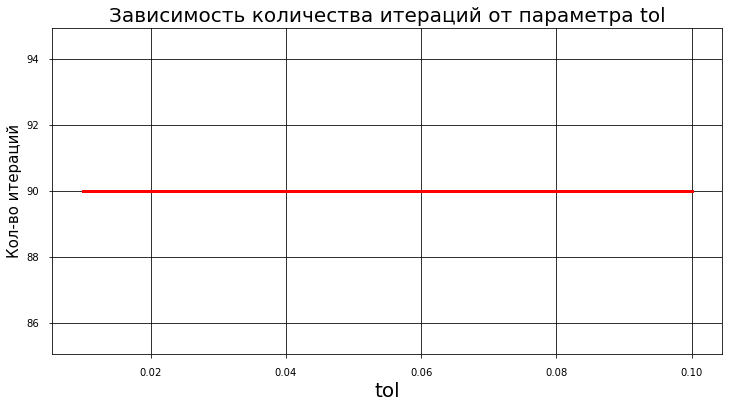

In [81]:
# tol - относительная толерантность к конвергенции
# кол-во итераций по сути не меняется, при tol=1 всего одна итераиция, но минимум не находится

res  =  [] 
param  =  []

for i in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
    res.append(differential_evolution(ackley,  bounds,  tol=i,  seed=42 )['nit']) 
    param.append(i)
    
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 3)
ax.grid(which='major',
        color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title("Зависимость количества итераций от параметра tol", size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('tol', size = 20) 
plt.show()    

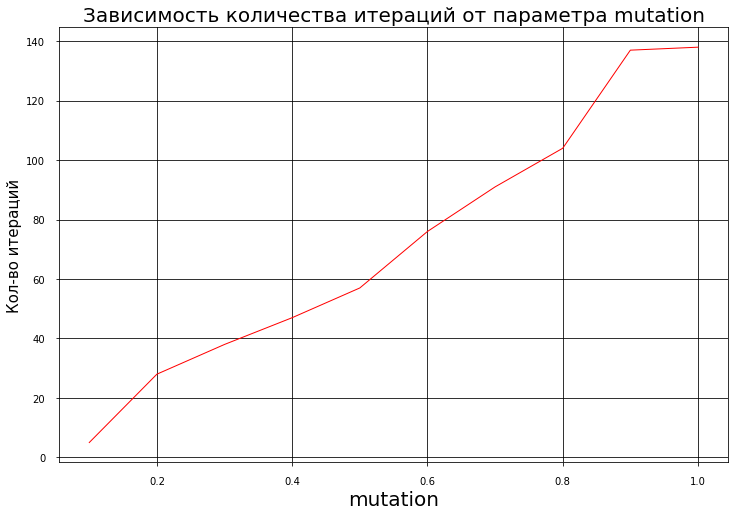

In [86]:
# mutation - константа мутации, по другому называют диф вес. Увеличение константы мутации увеличивает радиус поиска, но замедляет
# конвергенцию

res  =  [] 
param  =  []

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    res.append(differential_evolution(ackley,  bounds,  mutation=i,  seed=42 )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major',
        color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(8)

plt.title("Зависимость количества итераций от параметра mutation", size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('mutation', size = 20) 
plt.show()      

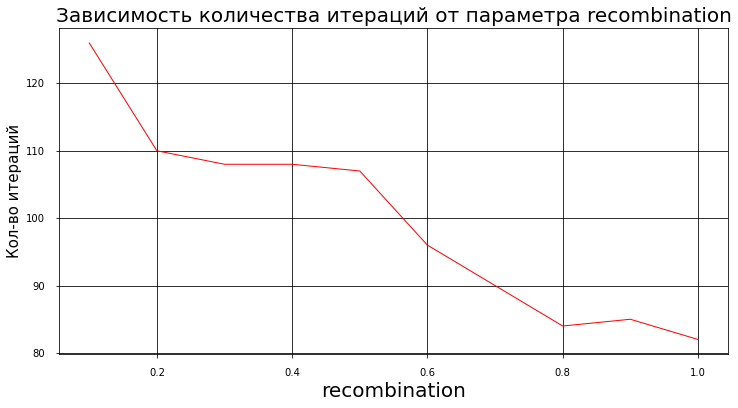

In [97]:
# recombination - константа рекомбинации или возможность перехода.

res  =  [] 
param  =  []

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    res.append(differential_evolution(ackley,  bounds,  recombination=i,  seed=42 )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major',
        color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title("Зависимость количества итераций от параметра recombination", size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('recombination', size = 20) 
plt.show()

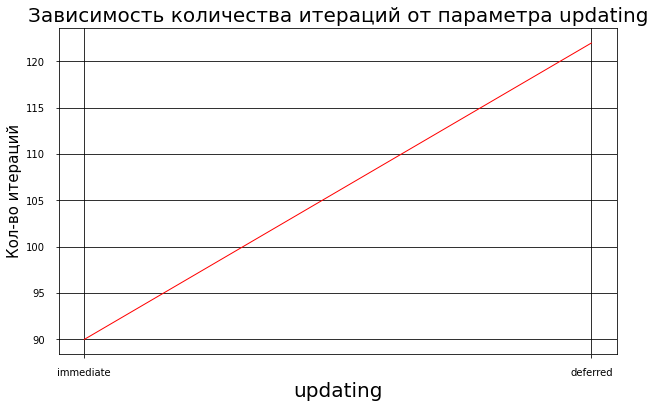

In [96]:
# updating: immediate - вектор лучшего решения постоянно обновляется в течение одного поколения. Это ведет к быстрой конвергенции.
# deferred - вектор обновляется один раз за поколение.

res  =  [] 
param  =  []

for i in ['immediate', 'deferred']:
    res.append(differential_evolution(ackley,  bounds, seed=42, updating=i )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major',
        color = 'k')




ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(10)
fig.set_figheight(6)

plt.title("Зависимость количества итераций от параметра updating", size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('updating', size = 20) 
plt.show()